<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_4'

In [4]:
os.listdir(base_path)

['data_multi_delta_4_n250.csv',
 'data_multi_delta_4_n120.csv',
 'data_multi_delta_4_n60.csv',
 'data_multi_delta_4_n30.csv',
 'data_multi_delta_4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.951277,61.345146,44.779797,-1140.030803,-971.954583,-1869.073559,897.118976
1,0.0,1.0,21.296676,59.488267,60.286167,-708.902444,-557.831335,-472.150298,-85.681037
2,0.0,2.0,59.885591,24.054843,88.632215,493.283035,675.855684,2669.031169,-1993.175485
3,0.0,3.0,91.680597,43.838989,65.833916,2781.933376,2993.286878,-320.174465,3313.461343
4,0.0,4.0,33.556811,58.897720,71.466455,-2402.532592,-2228.611605,-92.542797,-2136.068809
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,63.172242,40.284871,38.065828,-2340.261605,-2188.738664,599.150082,-2787.888745
29996,999.0,26.0,78.235839,31.214907,33.446303,972.733123,1125.630172,1060.249615,65.380557
29997,999.0,27.0,41.304189,38.383234,87.403651,1848.931373,2026.022446,946.743981,1079.278465
29998,999.0,28.0,82.955105,57.461649,41.265048,2722.675272,2914.357074,461.373951,2452.983123


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.951277,61.345146,44.779797,-1140.030803,-971.954583,-1869.073559,897.118976
1,0.0,1.0,21.296676,59.488267,60.286167,-708.902444,-557.831335,-472.150298,-85.681037
2,0.0,2.0,59.885591,24.054843,88.632215,493.283035,675.855684,2669.031169,-1993.175485
3,0.0,3.0,91.680597,43.838989,65.833916,2781.933376,2993.286878,-320.174465,3313.461343
4,0.0,4.0,33.556811,58.897720,71.466455,-2402.532592,-2228.611605,-92.542797,-2136.068809
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,63.172242,40.284871,38.065828,-2340.261605,-2188.738664,599.150082,-2787.888745
29996,999.0,26.0,78.235839,31.214907,33.446303,972.733123,1125.630172,1060.249615,65.380557
29997,999.0,27.0,41.304189,38.383234,87.403651,1848.931373,2026.022446,946.743981,1079.278465
29998,999.0,28.0,82.955105,57.461649,41.265048,2722.675272,2914.357074,461.373951,2452.983123


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    51.951277  61.345146  ... -1869.073559   897.118976
      1.0    21.296676  59.488267  ...  -472.150298   -85.681037
      2.0    59.885591  24.054843  ...  2669.031169 -1993.175485
      3.0    91.680597  43.838989  ...  -320.174465  3313.461343
      4.0    33.556811  58.897720  ...   -92.542797 -2136.068809
...                ...        ...  ...          ...          ...
999.0 25.0   63.172242  40.284871  ...   599.150082 -2787.888745
      26.0   78.235839  31.214907  ...  1060.249615    65.380557
      27.0   41.304189  38.383234  ...   946.743981  1079.278465
      28.0   82.955105  57.461649  ...   461.373951  2452.983123
      29.0   51.483516  84.192348  ...  -530.504057  1204.431618

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    51.951277  61.345146  ... -1869.073559   897.118976
      1.0    21.296676  59.488267  ...  -472.150298   -85.681037
      2.0    59.885591  24.054843  ...  2669.031169 -1993.175485
      3.0    91.680597  43.838989  ...  -320.174465  3313.461343
      4.0    33.556811  58.897720  ...   -92.542797 -2136.068809
...                ...        ...  ...          ...          ...
999.0 25.0   63.172242  40.284871  ...   599.150082 -2787.888745
      26.0   78.235839  31.214907  ...  1060.249615    65.380557
      27.0   41.304189  38.383234  ...   946.743981  1079.278465
      28.0   82.955105  57.461649  ...   461.373951  2452.983123
      29.0   51.483516  84.192348  ...  -530.504057  1204.431618

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.951277,61.345146,44.779797,-1140.030803,-971.954583,-1869.073559,897.118976
1,0.0,1.0,21.296676,59.488267,60.286167,-708.902444,-557.831335,-472.150298,-85.681037
2,0.0,2.0,59.885591,24.054843,88.632215,493.283035,675.855684,2669.031169,-1993.175485
3,0.0,3.0,91.680597,43.838989,65.833916,2781.933376,2993.286878,-320.174465,3313.461343
4,0.0,4.0,33.556811,58.897720,71.466455,-2402.532592,-2228.611605,-92.542797,-2136.068809
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,63.172242,40.284871,38.065828,-2340.261605,-2188.738664,599.150082,-2787.888745
29996,999.0,26.0,78.235839,31.214907,33.446303,972.733123,1125.630172,1060.249615,65.380557
29997,999.0,27.0,41.304189,38.383234,87.403651,1848.931373,2026.022446,946.743981,1079.278465
29998,999.0,28.0,82.955105,57.461649,41.265048,2722.675272,2914.357074,461.373951,2452.983123


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    51.951277  61.345146  ... -1869.073559   897.118976
      1.0    21.296676  59.488267  ...  -472.150298   -85.681037
      2.0    59.885591  24.054843  ...  2669.031169 -1993.175485
      3.0    91.680597  43.838989  ...  -320.174465  3313.461343
      4.0    33.556811  58.897720  ...   -92.542797 -2136.068809
...                ...        ...  ...          ...          ...
999.0 25.0   63.172242  40.284871  ...   599.150082 -2787.888745
      26.0   78.235839  31.214907  ...  1060.249615    65.380557
      27.0   41.304189  38.383234  ...   946.743981  1079.278465
      28.0   82.955105  57.461649  ...   461.373951  2452.983123
      29.0   51.483516  84.192348  ...  -530.504057  1204.431618

[30000 rows x 7 columns]

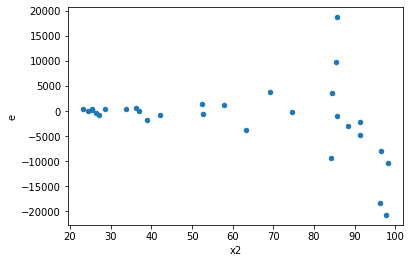

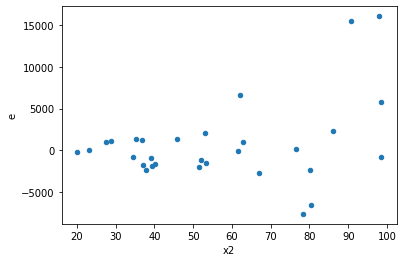

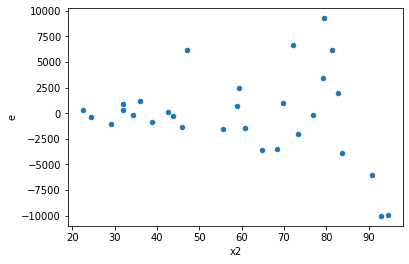

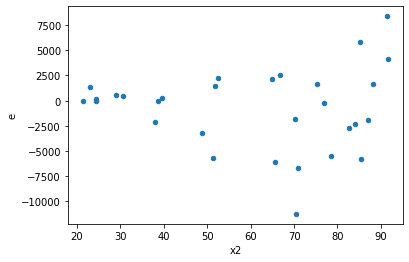

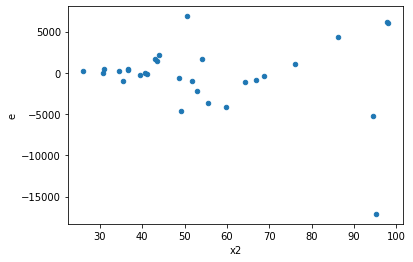

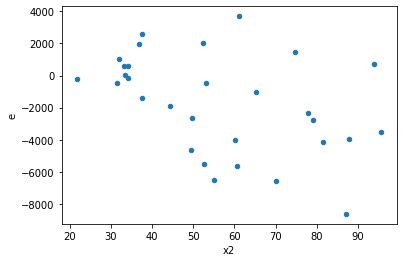

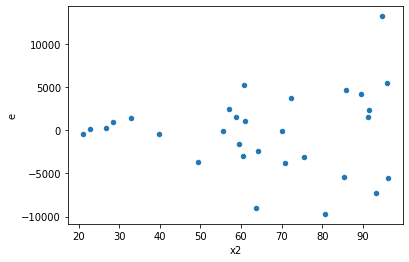

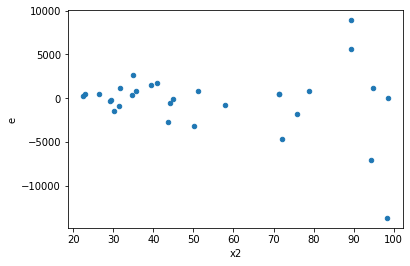

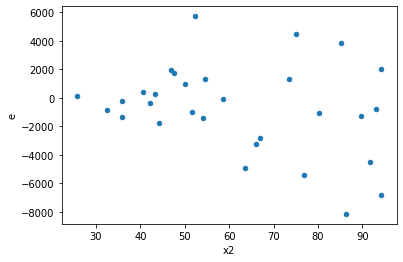

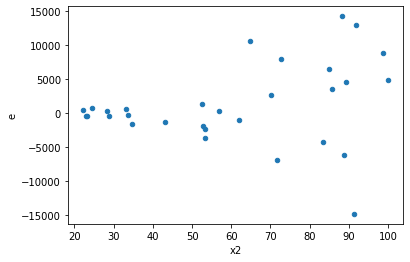

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,64199695.40854806,517303593.69247466,7133299.489838673,57478177.07694163,8.057726604472283,0.004701146494929143,0.9976494267525354,0.0023505732474645713,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,20792508.49854731,69902154.7015104,2310278.722060812,7766906.0779456,3.3618913613234396,0.08536639528337142,0.9573168023583143,0.04268319764168571,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,34314223.45846273,595892088.8735833,3812691.4953847476,66210232.097064815,17.365746003108857,0.00023167636619558785,0.9998841618169022,0.00011583818309779392,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,9851906.272070285,266086645.38746813,1094656.2524522538,29565182.820829794,27.008645640672803,3.666315042272217e-05,0.9999816684247886,1.8331575211361084e-05,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,49896171.78432501,351551437.5969135,5544019.087147224,39061270.8441015,7.0456595170564595,0.007670990905840114,0.9961645045470799,0.003835495452920057,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,20159435.91657525,905159103.3398979,2239937.3240639167,100573233.7044331,44.90002136397422,4.135933387550139e-06,0.9999979320333062,2.0679666937750696e-06,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,27721977.605680626,328326319.0039495,3080219.733964514,36480702.11154994,11.843538858377505,0.0010794872798685073,0.9994602563600657,0.0005397436399342537,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,24724654.050604913,332263990.5890287,2747183.783400546,36918221.17655875,13.438569854565856,0.0006542670635099057,0.999672866468245,0.00032713353175495286,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,21891565.759511434,284482634.8369832,2432396.1955012702,31609181.648553688,12.995079381810841,0.000747901933130235,0.9996260490334349,0.0003739509665651175,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')

result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,64199695.40854806,517303593.69247466,7133299.489838673,57478177.07694163,8.057726604472283,0.004701146494929143,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,20792508.49854731,69902154.7015104,2310278.722060812,7766906.0779456,3.3618913613234396,0.08536639528337142,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,34314223.45846273,595892088.8735833,3812691.4953847476,66210232.097064815,17.365746003108857,0.00023167636619558785,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,9851906.272070285,266086645.38746813,1094656.2524522538,29565182.820829794,27.008645640672803,3.666315042272217e-05,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,49896171.78432501,351551437.5969135,5544019.087147224,39061270.8441015,7.0456595170564595,0.007670990905840114,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,20159435.91657525,905159103.3398979,2239937.3240639167,100573233.7044331,44.90002136397422,4.135933387550139e-06,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,27721977.605680626,328326319.0039495,3080219.733964514,36480702.11154994,11.843538858377505,0.0010794872798685073,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,24724654.050604913,332263990.5890287,2747183.783400546,36918221.17655875,13.438569854565856,0.0006542670635099057,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,21891565.759511434,284482634.8369832,2432396.1955012702,31609181.648553688,12.995079381810841,0.000747901933130235,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    968
Reject005=1 : Homoscedasticity       32
Name: Result_test, dtype: int64